# Experiment 4

In [1]:
from generate_test_matrices import generate_hilbert_matrix, generate_A2, generate_A3
from SGN import SGN
import numpy as np
import matplotlib.pyplot as plt
import tqdm

Plot the error of the low-rank approximations that you obtain with ranks $r = 1, \dots, 100$, for $\ell = 0, \ell = 3, \ell = \text{floor}(r/2)$

In [3]:
#Generate the test matrix.
A = generate_hilbert_matrix(200)

#Calculate the error.
err_hilbert_l0    = [np.linalg.norm(A - SGN(A, r=r, ell=0, seed=42), ord='fro') for r in tqdm.tqdm(range(1, 101))]
err_hilbert_l3    = [np.linalg.norm(A - SGN(A, r=r, ell=3, seed=42), ord='fro') for r in tqdm.tqdm(range(1, 101))]
err_hilbert_floor = [np.linalg.norm(A - SGN(A, r=r, ell=None, seed=42), ord='fro') for r in tqdm.tqdm(range(1, 101))]

100%|██████████| 99/99 [00:00<00:00, 372.24it/s]


In [26]:
#Generate the test matrix.
A = generate_A2(200, seed=42)

#Calculate the error.
err_A2_l0    = [np.linalg.norm(A - SGN(A, r=r, ell=0, seed=42), ord='fro') for r in tqdm.tqdm(range(1, 101))]
err_A2_l3    = [np.linalg.norm(A - SGN(A, r=r, ell=3, seed=42), ord='fro') for r in tqdm.tqdm(range(1, 101))]
err_A2_floor = [np.linalg.norm(A - SGN(A, r=r, ell=None, seed=42), ord='fro') for r in tqdm.tqdm(range(1, 101))]

100%|██████████| 99/99 [00:00<00:00, 360.23it/s]


In [30]:
#Generate the test matrix.
A = generate_A3(200, seed=42)

#Calculate the error.
err_A3_l0    = [np.linalg.norm(A - SGN(A, r=r, ell=0, seed=42), ord='fro') for r in tqdm.tqdm(range(1, 101))]
err_A3_l3    = [np.linalg.norm(A - SGN(A, r=r, ell=3, seed=42), ord='fro') for r in tqdm.tqdm(range(1, 101))]
err_A3_floor = [np.linalg.norm(A - SGN(A, r=r, ell=None, seed=42), ord='fro') for r in tqdm.tqdm(range(1, 101))]

100%|██████████| 99/99 [00:00<00:00, 366.90it/s]


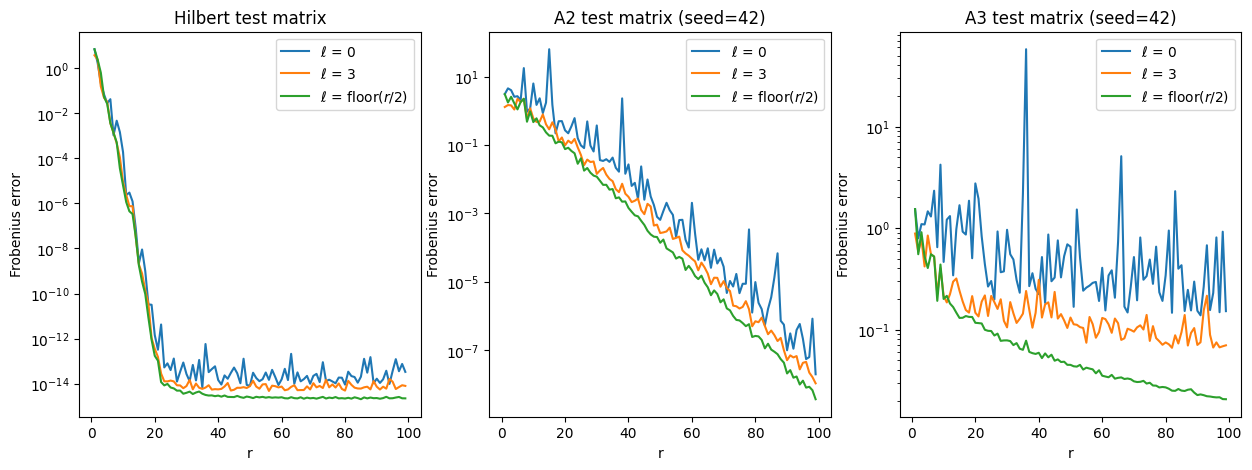

In [33]:
fig, ax = plt.subplots(nrows=1, ncols=3, figsize=(15, 5))

#Draw the Hilbert plot. 
ax[0].plot(range(1, 101), err_hilbert_l0, label='$\ell$ = 0')
ax[0].plot(range(1, 101), err_hilbert_l3, label='$\ell$ = 3')
ax[0].plot(range(1, 101), err_hilbert_floor, label='$\ell$ = floor($r$/2)')
ax[0].set_yscale('log')
ax[0].set_xlabel('r')
ax[0].set_ylabel('Frobenius error')

#Draw the legend.
ax[0].legend()

#Set the title.
ax[0].set_title('Hilbert test matrix')

#Draw the A2 plot.
ax[1].plot(range(1, 101), err_A2_l0, label='$\ell$ = 0')
ax[1].plot(range(1, 101), err_A2_l3, label='$\ell$ = 3')
ax[1].plot(range(1, 101), err_A2_floor, label='$\ell$ = floor($r$/2)')
ax[1].set_yscale('log')
ax[1].set_xlabel('r')
ax[1].set_ylabel('Frobenius error')

#Draw the legend.
ax[1].legend()

#Set the title.
ax[1].set_title('A2 test matrix (seed=42)')

#Draw the A3 plot.
ax[2].plot(range(1, 101), err_A3_l0, label='$\ell$ = 0')
ax[2].plot(range(1, 101), err_A3_l3, label='$\ell$ = 3')
ax[2].plot(range(1, 101), err_A3_floor, label='$\ell$ = floor($r$/2)')
ax[2].set_yscale('log')
ax[2].set_xlabel('r')
ax[2].set_ylabel('Frobenius error')

#Draw the legend.
ax[2].legend()

#Set the title.
ax[2].set_title('A3 test matrix (seed=42)')

plt.show()

# Experiment 5

In [49]:
#Create the A3 matrix.
A = generate_A3(200, seed=42)

def experiment_5(ell):
    #Make list to store mean and quantiles.
    mean = []
    q1 = []
    q2 = []
    q3 = []

    for r in tqdm.tqdm(range(1, 101)):
        err_A3_seed = [np.linalg.norm(A - SGN(A, r=r, ell=ell, seed=seed), ord='fro') for seed in range(1, 1000)]
        #Calculate the mean and 95th quantiles.
        mean_r = np.mean(err_A3_seed)
        lwr, median, upper = np.quantile(err_A3_seed, [0.025, 0.5, 0.975])

        #Append to the list.
        mean.append(mean_r)
        q1.append(lwr)
        q2.append(median)
        q3.append(upper)

    return mean, q1, q2, q3

100%|██████████| 99/99 [03:39<00:00,  2.21s/it]


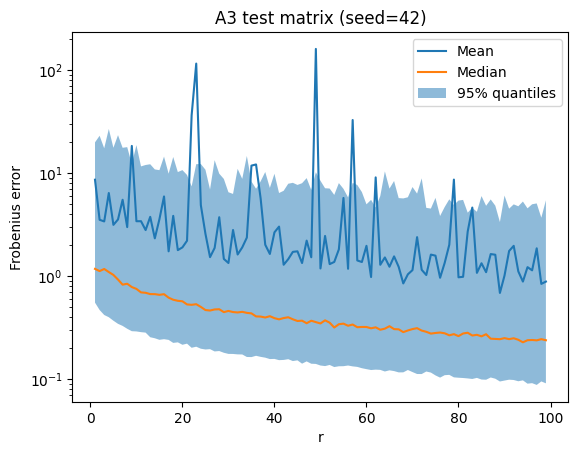

In [50]:
#Calculate the error for varying seed of the SGN algorithm.
mean, q1, q2, q3 = experiment_5(ell=0)

#Plot the results.
plt.plot(range(1, 100), mean, label='Mean')
plt.plot(range(1, 100), q2, label='Median')
plt.fill_between(range(1, 100), q1, q3, alpha=0.5, label='95% quantiles')
plt.xlabel('r')
plt.ylabel('Frobenius error')
plt.title('A3 test matrix (seed=42)')
plt.semilogy()
plt.legend()
plt.show()

100%|██████████| 99/99 [03:45<00:00,  2.28s/it]


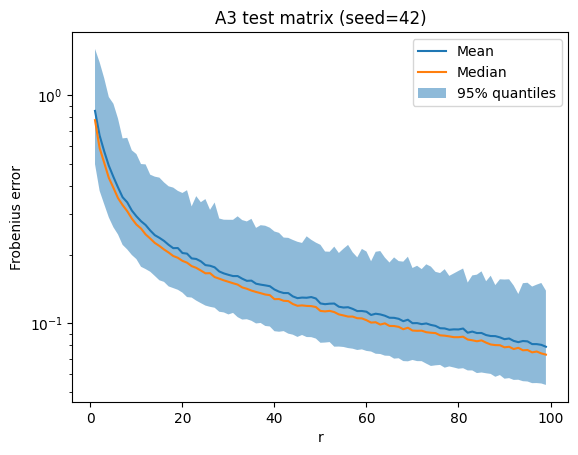

In [51]:
#Calculate the error for varying seed of the SGN algorithm.
mean, q1, q2, q3 = experiment_5(ell=3)

#Plot the results.
plt.plot(range(1, 100), mean, label='Mean')
plt.plot(range(1, 100), q2, label='Median')
plt.fill_between(range(1, 100), q1, q3, alpha=0.5, label='95% quantiles')
plt.xlabel('r')
plt.ylabel('Frobenius error')
plt.title('A3 test matrix (seed=42)')
plt.semilogy()
plt.legend()
plt.show()

100%|██████████| 99/99 [04:24<00:00,  2.67s/it]


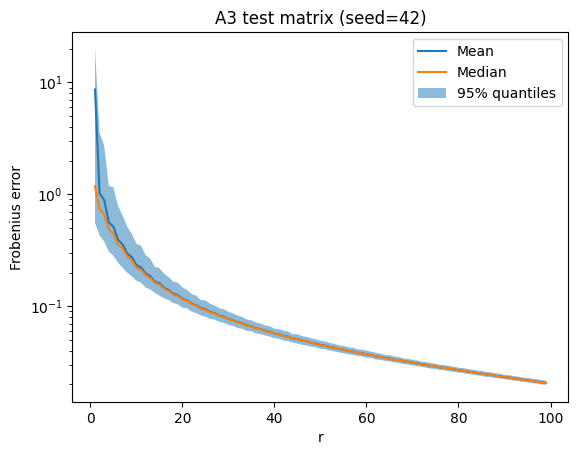

In [52]:
#Calculate the error for varying seed of the SGN algorithm.
mean, q1, q2, q3 = experiment_5(ell=None)

#Plot the results.
plt.plot(range(1, 100), mean, label='Mean')
plt.plot(range(1, 100), q2, label='Median')
plt.fill_between(range(1, 100), q1, q3, alpha=0.5, label='95% quantiles')
plt.xlabel('r')
plt.ylabel('Frobenius error')
plt.title('A3 test matrix (seed=42)')
plt.semilogy()
plt.legend()
plt.show()